# 🧑‍💻 Let's Code ARIMA

In the last notebook we saw how the ARIMA is interconnected... or say what happens in the ARIMA. Now, it is time to see that in action. 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

from statsmodels.tsa.arima_model import ARIMA

# optional
import warnings
warnings.filterwarnings("ignore")

To start with the ***understanding*** of how ARIMA behaves, and also the different combinations of the parameters... we will *first see the old — airline* data and then will see the stock prices.

In [6]:
df = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)
df.index.freq = "MS"
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
train = df.iloc[:-12]
test = df.iloc[-12:]

Sou, our data is...

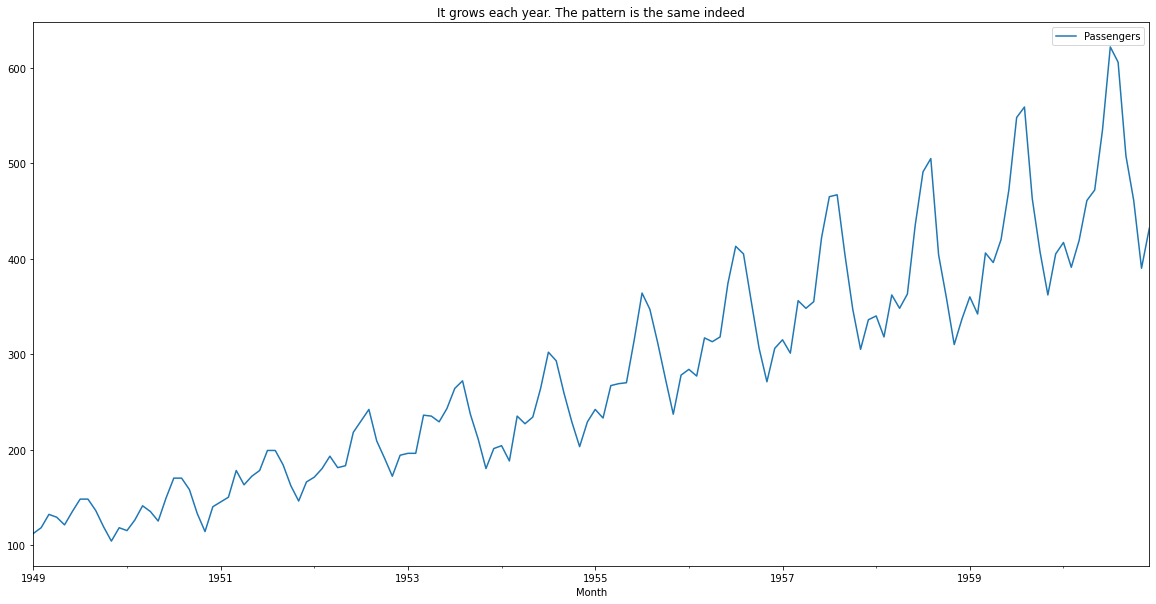

In [10]:
df.plot()
plt.title("It grows each year. The pattern is the same indeed");

#### First off, let's see how it behaves with our simple model `ARIMA(1, 0, 0)` which means:
> The upcoming value only depends on the previous value. Just like the random-walk model. `AR(1)`.

In [15]:
model = ARIMA(train, order=(1, 0, 0))

In [17]:
result = model.fit()

This time `result.forecast` will return 3 values. 
1. Real forecast
2. Std Error
3. Confidence interval

So, we will use `1.` and `3.` to show in the plot.

In [49]:
pred_100, _, conf_inter_100 = result.forecast(12)

In [50]:
pred_100 = pd.Series(pred_100, index=test.index)

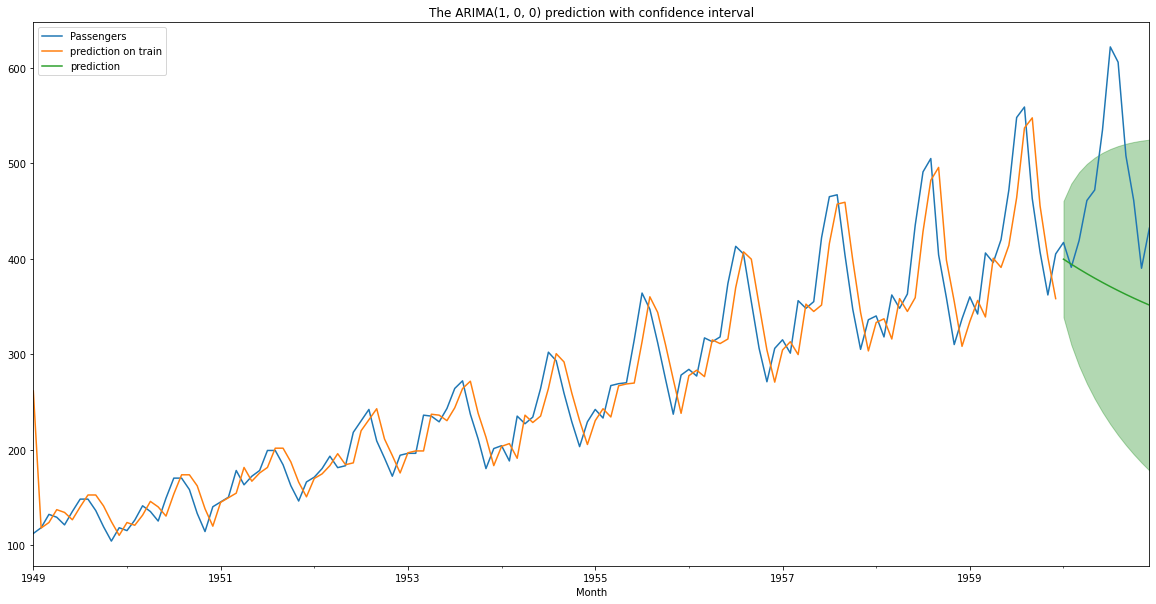

In [65]:
df.plot(label="real data")
result.predict(train.index[0], train.index[-1]).plot(label="prediction on train")
pred_100.plot(label="prediction")
plt.fill_between(pred_100.index, 
                 conf_inter_100[:, 0],
                 conf_inter_100[:, 1],
                 alpha=0.3,
                 color="green")

plt.legend()
plt.title("The ARIMA(1, 0, 0) prediction with confidence interval");

Mesmarizing? <br>
Nah, but the thing is that **it has only run on single past value**. So, it has to act werid. The *wierder* thing is that, dispite of overall upward trend, it is showing the down trend! How foolish!

But still, **if you look closely** the value had to drop once. As per the season, the value ther should drop and then rise. Try to analyze.

##### 

### 🤔 Other set of parameters? 
Sure, but first let's make a function to do the same job again and again. 

In [103]:
def get_and_plot(result, h, title=None):
    """
    This function will take the result and then from the learnd values,
    it will make forecast (in-sample and out-sample).
    
    Then it will plot the result!
    """
    pred, _, conf_inter = result.forecast(h)
    forecast_index = pd.date_range(test.index[0], periods=h, freq="MS")
    pred = pd.Series(pred, index=forecast_index)

    df.plot(label="real data")
    result.fittedvalues.plot(label="prediction on train")
    pred.plot(label="prediction")
    plt.fill_between(pred.index, 
                     conf_inter[:, 0],
                     conf_inter[:, 1],
                     alpha=0.3,
                     color="green")

    plt.legend()
    if title:
        plt.title(title);
    else:
        plt.title("The prediction with confidence interval");

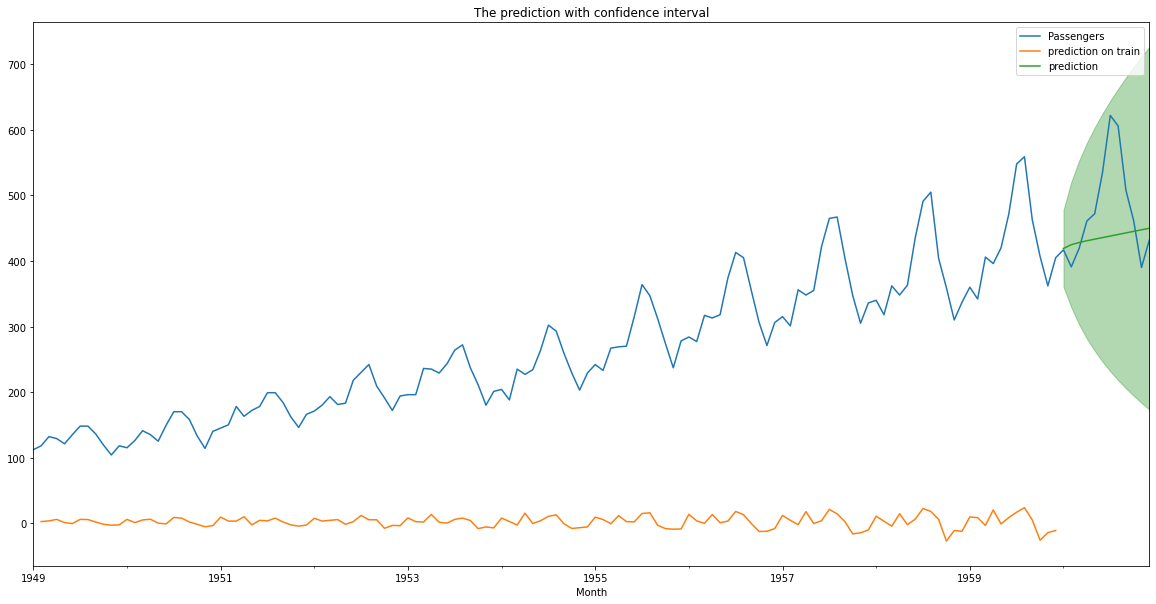

In [105]:
arima_110 = ARIMA(train, order=(1, 1, 0))
result = arima_110.fit()
get_and_plot(result, 12)